<a href="https://colab.research.google.com/github/sphuang28/tibaml1017/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# 統計需要資料量:
# ML: 1K以上 DL: 1W以上 
# 資料量多寡 -> 問題難度(大概跟你欄位數目掛勾)
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["ans"] = iris["target"]
x = df.drop('ans',axis=1)

In [45]:
# 處理資料 : pandas  -> DataFrame
# 進到模型 sklearn : nummpy --> array
# 將資料分成兩類 訓練+驗證 
# train_test_split 並把對應位置留住

import numpy as np
from sklearn.model_selection import train_test_split
x = df.drop("ans", axis=1)
x = np.array(x)
y = np.array(df["ans"])
# [90% x, 10% x, 90% y, 10 % y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [46]:
x_test

array([[5.5, 2.4, 3.8, 1.1],
       [4.8, 3.1, 1.6, 0.2],
       [7.1, 3. , 5.9, 2.1],
       [5.9, 3.2, 4.8, 1.8],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.2],
       [5.8, 2.8, 5.1, 2.4],
       [4.6, 3.4, 1.4, 0.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [5.5, 2.6, 4.4, 1.2],
       [7.2, 3.2, 6. , 1.8],
       [6.3, 2.3, 4.4, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [4.9, 3.6, 1.4, 0.1]])

In [47]:
# pandas.drop 重點
# axis!!!! axis 0=切掉列 1=切掉欄
d = pd.DataFrame([
    [1, 2],
    [3, 4]
], columns=["a", "b"], index=["a", "b"])

print(d)
print(d.drop("a", axis=0))
print(d.drop("a", axis=1))

   a  b
a  1  2
b  3  4
   a  b
b  3  4
   b
a  2
b  4


In [48]:
# train_test_split 並把對應位置留住
train_test_split([1,2,3,4],
         [5,6,7,8],
         [9,10,11,12],
        test_size=0.25)

[[3, 4, 1], [2], [7, 8, 5], [6], [11, 12, 9], [10]]

In [60]:
#演算法 --- 決策樹
#決策點 --> 找出信心程度最高 --> 目標gini = 0
#gini 失敗機率
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.4444444444444444, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 135\nvalue = [44, 46, 45]\nclass = versicolor'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]\nclass = setosa'),
 Text(0.5555555555555556, 0.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 91\nvalue = [0, 46, 45]\nclass = versicolor'),
 Text(0.4444444444444444, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.177\nsamples = 51\nvalue = [0, 46, 5]\nclass = versicolor'),
 Text(0.2222222222222222, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.043\nsamples = 45\nvalue = [0, 44, 1]\nclass = versicolor'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]\nclass = versicolor'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6666666666666666, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 T

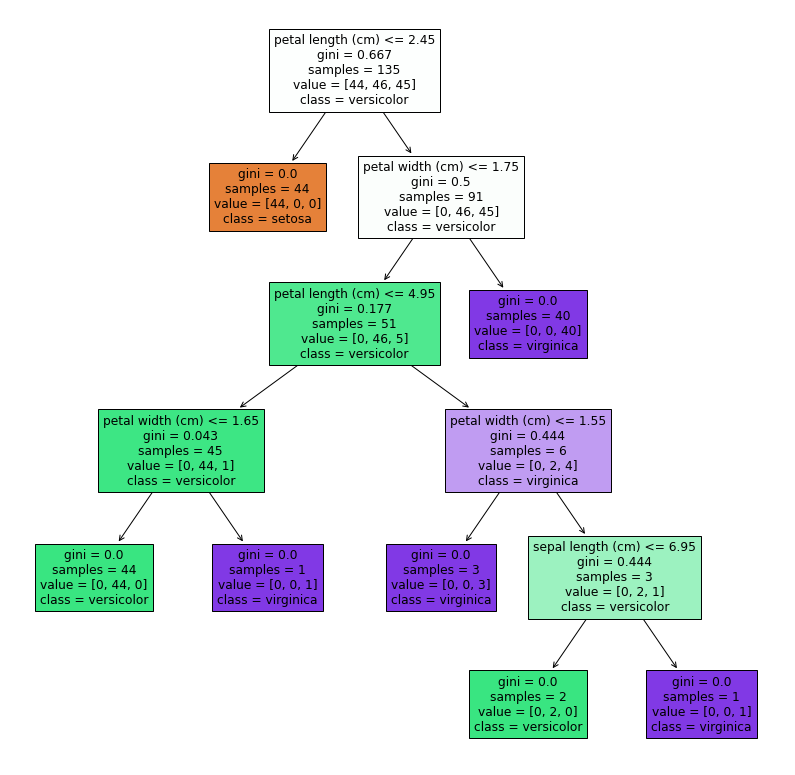

In [61]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
plot_tree(clf, 
     feature_names=iris["feature_names"], 
     filled=True,
     class_names=iris["target_names"])